# Validation des modèles

## 1 - Fonctions d'analyse

In [1]:
import sklearn
import numpy as np
import pandas as pd


# Fonction pour le calcul de la matrice de confusion
def compute_confusion_matrix(y_true, y_pred, classes, abreviations=None):
    """Compute the confusion matrix and performance metrics

    This function computes the confusion matrix and performance measures such as
    recall, precision and accuracy. The confusion matrix and the performance metrics
    are written in a pandas DataFrame.

    Parameters
    ----------
    y_true : numpy.ndarray
        Array containing the true numeric classes from the data.
    y_pred : numpy.ndarray
        Array containing the predicted numeric classes by the model.
    classes : list, numpy.ndarray
        List of labels for the classes of the data.capitalize
    abreviations : list, numpy.ndarray, default: None
        List of abreviations for the classes to use as table columns. If None, use the
        classes also for the columns.

    Returns
    -------
    pandas.DataFrame
        Dataframe containing the confusion matrix and performance metrics.

    """
    if abreviations is None:
        abreviations = classes

    # Compute confusion matrix
    confusion_matrix = sklearn.metrics.confusion_matrix(y_true, y_pred)

    # Diagonal range index
    idx = np.arange(confusion_matrix.shape[0])

    # Recall
    recall = confusion_matrix[idx, idx] / confusion_matrix.sum(axis=1)

    # Precision
    precision = confusion_matrix[idx, idx] / confusion_matrix.sum(axis=0)

    # Accuracy
    accuracy = confusion_matrix[idx, idx].sum() / confusion_matrix.sum()

    # Creating dataframe
    columns = list(abreviations) + ["Recall"]
    rows = list(classes) + ["Precision"]
    df = pd.DataFrame(np.nan, index=rows, columns=columns)
    df.loc[classes, abreviations] = confusion_matrix
    df.loc[classes, "Recall"] = recall
    df.loc["Precision", abreviations] = precision
    df.loc["Precision", "Recall"] = accuracy

    return df

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Fonction pour l'affichage de la matrice de confusion
def display_confusion_matrix(confusion_matrix, origin="upper", title=None):
    """Display the confusion matrix in a matplotlib figure

    This function uses matplotlib to display the confusion matrix with the
    :func:`matplotlib.pyplot.imshow` function.

    Parameters
    ----------
    confusion_matrix : pandas.DataFrame
        Dataframe containing the confusion matrix and the performance metrics such as
        recall, precision and accuracy. The `confusion_matrix` is generally returned
        from the `compute_confusion_matrix` function of this notebook.

    origin : {'upper', 'lower'}, default: 'upper'
        Whether to display the confusion matrix using a upper left origin or a lower
        left origin.

    Returns
    -------
    matplotlib.figure.Figure
        The matplotlib figure object that is created using this function

    """
    classes = confusion_matrix.columns[:-1]

    fig, ax = plt.subplots(figsize=(7, 7), layout="constrained")

    if origin == "upper":
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position("top")

    img = ax.imshow(
        confusion_matrix.values[:-1, :-1], cmap="Blues", origin=origin, vmin=0
    )

    ax.set_yticks(np.arange(len(classes)), labels=classes)
    ax.set_xticks(np.arange(len(classes)), labels=classes, rotation=90)

    # Adding labels
    ax.set_ylabel("True class", size=16)
    ax.set_xlabel("Predicted class", size=16)

    # Adding test
    for i in range(len(classes)):
        for j in range(len(classes)):
            value = confusion_matrix.values[i, j]
            vmax = img.get_clim()[1]
            color = "w" if value > 0.5 * vmax else "k"
            ax.text(
                j,
                i,
                f"{value:0.0f}",
                ha="center",
                va="center",
                color=color,
            )

    # Adding precision and recall
    for i in range(len(classes)):
        # Precision
        ax.text(
            -0.7,
            len(classes),
            "PRECISION",
            ha="right",
            va="center",
            color="k",
            fontweight="bold",
        )

        ax.text(
            i,
            len(classes),
            f"{100*confusion_matrix.iloc[-1, i]:0.0f}%",
            ha="center",
            va="center",
            color="k",
        )

        # Recall
        ax.text(
            len(classes),
            -0.7,
            "RECALL",
            ha="center",
            va="bottom" if origin == "upper" else "top",
            color="k",
            rotation=90,
            fontweight="bold",
        )

        ax.text(
            len(classes),
            i,
            f"{100*confusion_matrix.iloc[i, -1]:0.0f}%",
            ha="center",
            va="center",
            color="k",
        )

        # Accuracy
        ax.text(
            len(classes),
            len(classes),
            f"{100*confusion_matrix.iloc[-1,-1]:0.0f}%",
            ha="center",
            va="center",
            color="k",
            fontweight="bold",
        )

    # Set title
    if title is not None:
        fig.suptitle(title, fontsize=18, fontweight="bold")

    return fig

## 2 - Tomates, multi-classes, 2025-02-28

In [3]:
# On loade les résultats
test_results = pd.read_csv(
    "results/tomato_model_2025_02_28_v2.csv",
    index_col=0,
    dtype={
        "filename": str,
        "source": "category",
        "subset": "category",
        "class": "category",
        "pred": "category",
    },
)

# On s'assure que les catégories sont les mêmes
test_results["pred"] = test_results["pred"].cat.set_categories(
    test_results["class"].cat.categories
)

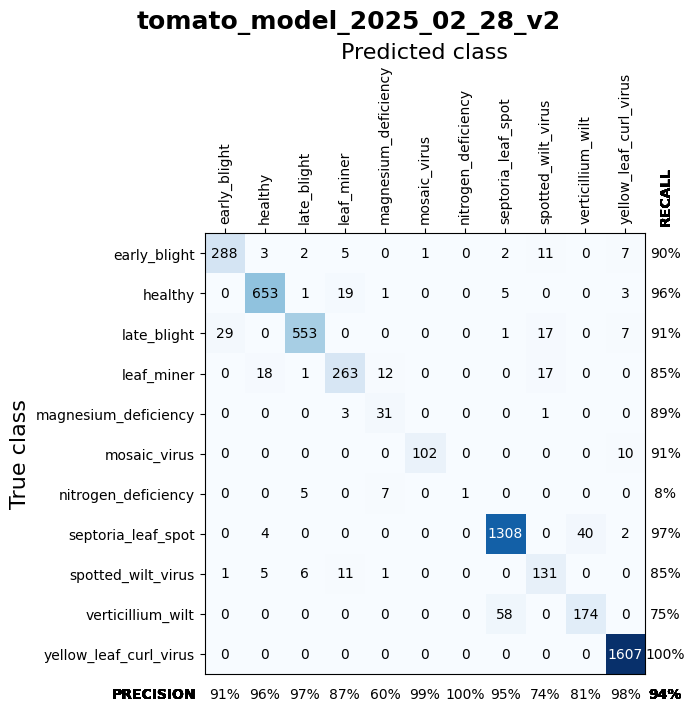

In [4]:
%matplotlib inline

# On calcule et affiche la matrice de confusion
confusion_matrix = compute_confusion_matrix(
    test_results["class"].cat.codes,
    test_results["pred"].cat.codes,
    test_results["class"].cat.categories,
)

fig = display_confusion_matrix(confusion_matrix, title="tomato_model_2025_02_28_v2")
fig.savefig("results/tomato_model_2025_02_28_v2.png", dpi=300)

## 3 - Tomates, multi-classes, 2025-03-11

In [ ]:
# On loade les résultats
test_results = pd.read_csv(
    "results/tomato_model_2025_03_11.csv",
    index_col=0,
    dtype={
        "filename": str,
        "source": "category",
        "subset": "category",
        "class": "category",
        "pred": "category",
    },
)

# On s'assure que les catégories sont les mêmes
test_results["pred"] = test_results["pred"].cat.set_categories(
    test_results["class"].cat.categories
)

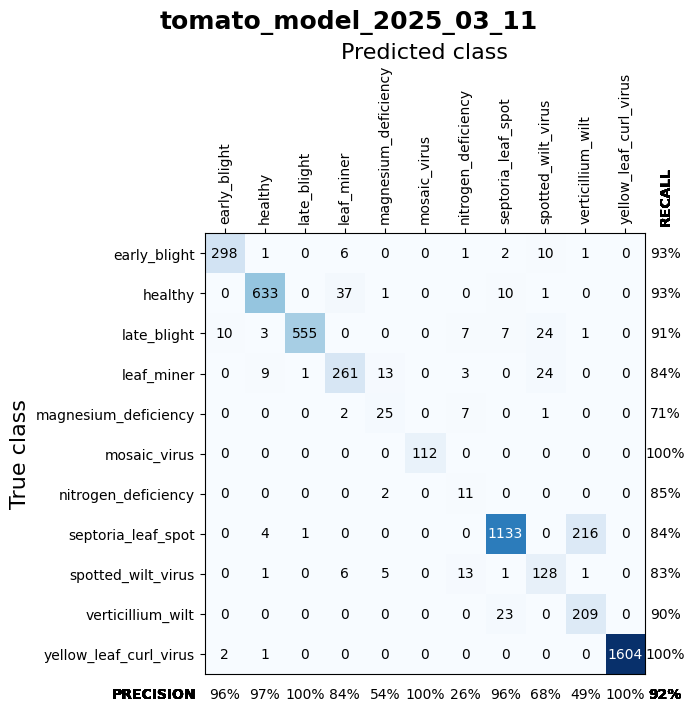

In [6]:
%matplotlib inline

# On calcule et affiche la matrice de confusion
confusion_matrix = compute_confusion_matrix(
    test_results["class"].cat.codes,
    test_results["pred"].cat.codes,
    test_results["class"].cat.categories,
)

fig = display_confusion_matrix(confusion_matrix, title="tomato_model_2025_03_11")
fig.savefig("results/tomato_model_2025_03_11.png", dpi=300)

## 4 - Tomates, multi-classes, 2025-03-26 (MobileNetV3, poids)

In [4]:
# On loade les résultats
test_results = pd.read_csv(
    "results/tomato_model_2025_03_26_weights.csv",
    index_col=0,
    dtype={
        "filename": str,
        "source": "category",
        "subset": "category",
        "class": "category",
        "pred": "category",
    },
)

# On s'assure que les catégories sont les mêmes
test_results["pred"] = test_results["pred"].cat.set_categories(
    test_results["class"].cat.categories
)

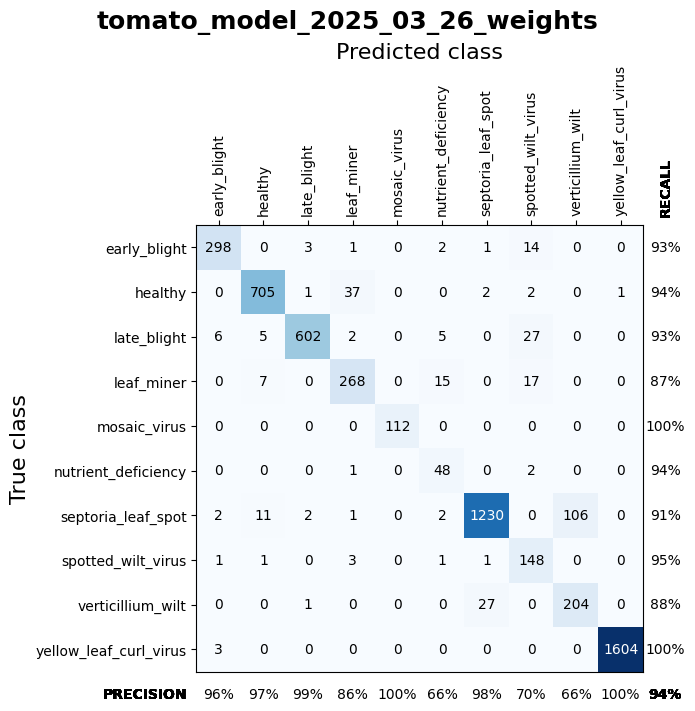

In [5]:
%matplotlib inline

# On calcule et affiche la matrice de confusion
confusion_matrix = compute_confusion_matrix(
    test_results["class"].cat.codes,
    test_results["pred"].cat.codes,
    test_results["class"].cat.categories,
)

fig = display_confusion_matrix(confusion_matrix, title="tomato_model_2025_03_26_weights")
fig.savefig("results/tomato_model_2025_03_26_weights.png", dpi=300)

## 5 - Tomates, multi-classes, 2025-03-26 (MobileNetV3, échantillonnage)

In [6]:
# On loade les résultats
test_results = pd.read_csv(
    "results/tomato_model_2025_03_26_sample.csv",
    index_col=0,
    dtype={
        "filename": str,
        "source": "category",
        "subset": "category",
        "class": "category",
        "pred": "category",
    },
)

# On s'assure que les catégories sont les mêmes
test_results["pred"] = test_results["pred"].cat.set_categories(
    test_results["class"].cat.categories
)

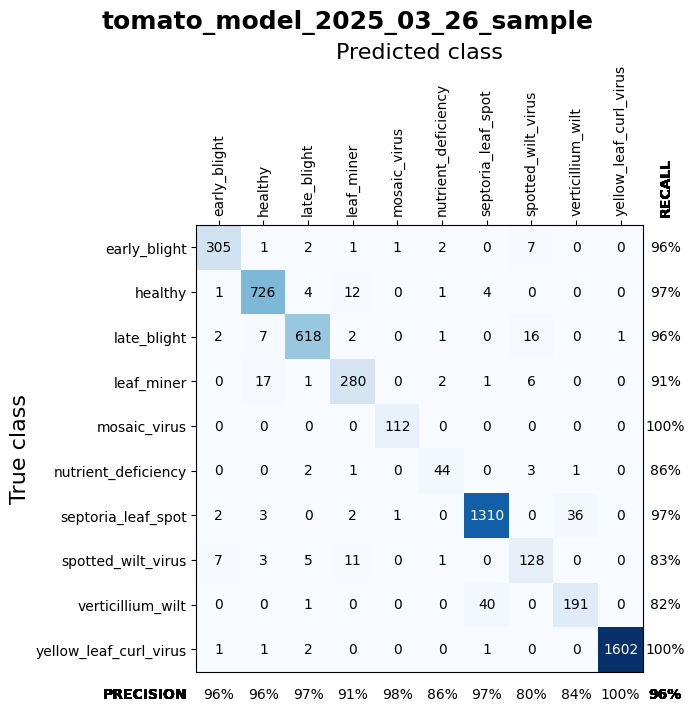

In [7]:
%matplotlib inline

# On calcule et affiche la matrice de confusion
confusion_matrix = compute_confusion_matrix(
    test_results["class"].cat.codes,
    test_results["pred"].cat.codes,
    test_results["class"].cat.categories,
)

fig = display_confusion_matrix(confusion_matrix, title="tomato_model_2025_03_26_sample")
fig.savefig("results/tomato_model_2025_03_26_sample.png", dpi=300)

## 6 - Détection des plantes (MobileNetV3)

In [12]:
# On loade les résultats
test_results = pd.read_csv(
    "results/plant_model_2025_03_21.csv",
    index_col=0,
    dtype={
        "filename": str,
        "source": "category",
        "subset": "category",
        "plant": "category",
        "class": "category",
        "pred": "category",
    },
)

# On s'assure que les catégories sont les mêmes
test_results["pred"] = test_results["pred"].cat.set_categories(
    test_results["plant"].cat.categories
)

In [13]:
test_results

,filename,source,subset,class,plant,pred
0,IMG20220323104920.jpg,tomato_village,test,early_blight,tomato,tomato
7,IMG20220323102220.jpg,tomato_village,test,early_blight,tomato,tomato
12,IMG20220323103125.jpg,tomato_village,test,early_blight,tomato,tomato
15,IMG20220323104634.jpg,tomato_village,test,early_blight,tomato,tomato
18,IMG20220323110739.jpg,tomato_village,test,early_blight,tomato,tomato
...,...,...,...,...,...,...
31341,Po_lt_blight_(693).jpg,nzdl,test,late_blight,potato,potato
31351,Po_lt_blight_(703).jpg,nzdl,test,late_blight,potato,potato
31352,Po_lt_blight_(704).jpg,nzdl,test,late_blight,potato,potato
31353,Po_lt_blight_(646).jpg,nzdl,test,late_blight,potato,potato


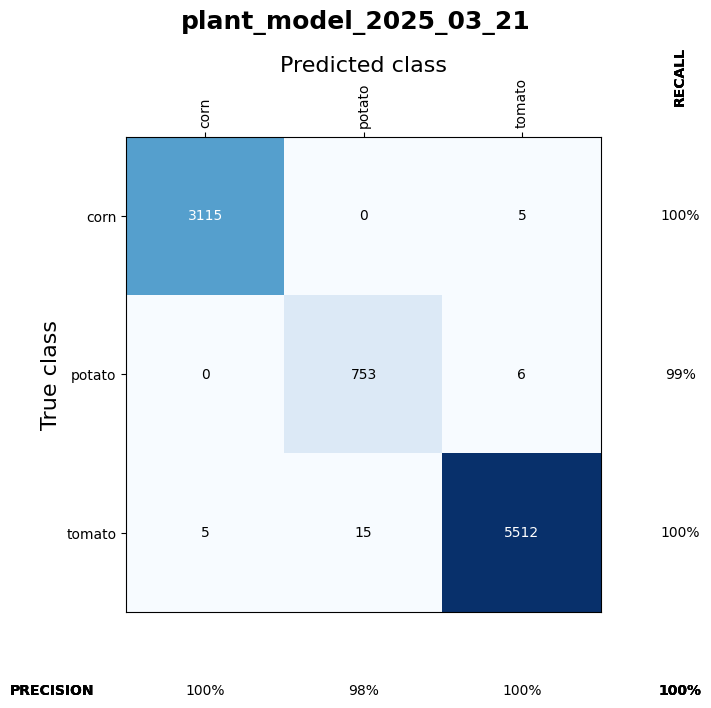

In [15]:
%matplotlib inline

# On calcule et affiche la matrice de confusion
confusion_matrix = compute_confusion_matrix(
    test_results["plant"].cat.codes,
    test_results["pred"].cat.codes,
    test_results["plant"].cat.categories,
)

fig = display_confusion_matrix(confusion_matrix, title="plant_model_2025_03_21")
fig.savefig("results/plant_model_2025_03_21.png", dpi=300)